In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


In [2]:
data=pd.read_csv('SupplyChain management.csv')

In [3]:
data


,Ware_house_ID,WH_Manager_ID,Location_type,WH_capacity_size,zone,WH_regional_zone,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,...,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,approved_wh_govt_certificate,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
0,WH_100000,EID_50000,Urban,Small,West,Zone 6,3,1,2,4651,...,1,91,29.0,NaN,13,0,A,5,15,17115
1,WH_100001,EID_50001,Rural,Large,North,Zone 5,0,0,4,6217,...,1,210,31.0,NaN,4,0,A,3,17,5074
2,WH_100002,EID_50002,Rural,Mid,South,Zone 2,1,0,4,4306,...,0,161,37.0,NaN,17,0,A,6,22,23137
3,WH_100003,EID_50003,Rural,Mid,North,Zone 3,7,4,2,6000,...,0,103,21.0,NaN,17,1,A+,3,27,22115
4,WH_100004,EID_50004,Rural,Large,North,Zone 5,3,1,2,4740,...,1,112,25.0,2009.0,18,0,C,6,24,24071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16615,WH_116615,EID_66615,Urban,Large,West,Zone 6,3,1,6,4779,...,0,240,19.0,2009.0,14,0,B+,5,23,16094
16616,WH_116616,EID_66616,Urban,Large,North,Zone 5,2,0,2,5718,...,1,164,30.0,NaN,17,0,B+,6,24,21113
16617,WH_116617,EID_66617,Rural,Large,North,Zone 6,5,0,4,4514,...,1,211,24.0,2003.0,24,1,B,5,29,28117
16618,WH_116618,EID_66618,Rural,Small,West,Zone 6,3,2,3,5829,...,1,119,NaN,2007.0,16,0,A,5,15,21103


In [4]:
data.columns

Index(['Ware_house_ID', 'WH_Manager_ID', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'num_refill_req_l3m', 'transport_issue_l1y',
       'Competitor_in_mkt', 'retail_shop_num', 'wh_owner_type',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num', 'wh_est_year',
       'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16620 entries, 0 to 16619
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 16620 non-null  object 
 1   WH_Manager_ID                 16620 non-null  object 
 2   Location_type                 16620 non-null  object 
 3   WH_capacity_size              16620 non-null  object 
 4   zone                          16620 non-null  object 
 5   WH_regional_zone              16620 non-null  object 
 6   num_refill_req_l3m            16620 non-null  int64  
 7   transport_issue_l1y           16620 non-null  int64  
 8   Competitor_in_mkt             16620 non-null  int64  
 9   retail_shop_num               16620 non-null  int64  
 10  wh_owner_type                 16620 non-null  object 
 11  distributor_num               16620 non-null  int64  
 12  flood_impacted                16620 non-null  int64  
 13  f

In [6]:
data.size

398880

In [7]:
data.shape

(16620, 24)

In [8]:
data.isnull().sum()

Ware_house_ID                      0
WH_Manager_ID                      0
Location_type                      0
WH_capacity_size                   0
zone                               0
WH_regional_zone                   0
num_refill_req_l3m                 0
transport_issue_l1y                0
Competitor_in_mkt                  0
retail_shop_num                    0
wh_owner_type                      0
distributor_num                    0
flood_impacted                     0
flood_proof                        0
electric_supply                    0
dist_from_hub                      0
workers_num                      667
wh_est_year                     7860
storage_issue_reported_l3m         0
temp_reg_mach                      0
approved_wh_govt_certificate     599
wh_breakdown_l3m                   0
govt_check_l3m                     0
product_wg_ton                     0
dtype: int64

#Observation:
1) Number of workers having missing value is 667

2) warehouse estimated year having missing value is 7860

3) Approved warehouse with govt certificate having missing value 599.

In [9]:
rows_with_nan =data.isnull().any(axis=1)

In [10]:
data[rows_with_nan].loc[:,['workers_num','wh_est_year','approved_wh_govt_certificate']]

,workers_num,wh_est_year,approved_wh_govt_certificate
0,29.0,NaN,A
1,31.0,NaN,A
2,37.0,NaN,A
3,21.0,NaN,A+
7,23.0,NaN,C
...,...,...,...
16612,20.0,NaN,B
16613,29.0,NaN,B
16614,NaN,2009.0,A
16616,30.0,NaN,B+


In [11]:
warehouse_id=data.loc[:,['Ware_house_ID','WH_Manager_ID','wh_est_year','workers_num','approved_wh_govt_certificate']]
n_Value=warehouse_id[warehouse_id['wh_est_year'].isnull()]
n_Value

,Ware_house_ID,WH_Manager_ID,wh_est_year,workers_num,approved_wh_govt_certificate
0,WH_100000,EID_50000,NaN,29.0,A
1,WH_100001,EID_50001,NaN,31.0,A
2,WH_100002,EID_50002,NaN,37.0,A
3,WH_100003,EID_50003,NaN,21.0,A+
7,WH_100007,EID_50007,NaN,23.0,C
...,...,...,...,...,...
16610,WH_116610,EID_66610,NaN,29.0,B
16611,WH_116611,EID_66611,NaN,19.0,A
16612,WH_116612,EID_66612,NaN,20.0,B
16613,WH_116613,EID_66613,NaN,29.0,B


In [12]:
data['wh_est_year']=data['wh_est_year'].replace(to_replace=np.nan,value=0)

In [13]:
data['approved_wh_govt_certificate']=data['approved_wh_govt_certificate'].replace(to_replace=np.nan,value=0)

In [14]:
data.isnull().sum()

Ware_house_ID                     0
WH_Manager_ID                     0
Location_type                     0
WH_capacity_size                  0
zone                              0
WH_regional_zone                  0
num_refill_req_l3m                0
transport_issue_l1y               0
Competitor_in_mkt                 0
retail_shop_num                   0
wh_owner_type                     0
distributor_num                   0
flood_impacted                    0
flood_proof                       0
electric_supply                   0
dist_from_hub                     0
workers_num                     667
wh_est_year                       0
storage_issue_reported_l3m        0
temp_reg_mach                     0
approved_wh_govt_certificate      0
wh_breakdown_l3m                  0
govt_check_l3m                    0
product_wg_ton                    0
dtype: int64

In [15]:
capacity=data.groupby('WH_capacity_size')['workers_num'].count()

In [16]:
capacity

WH_capacity_size
Large    6461
Mid      6442
Small    3050
Name: workers_num, dtype: int64

In [17]:
workers=data.loc[:,['WH_capacity_size','workers_num']]
n_workers_Value=workers[workers['workers_num'].isnull()]
n_workers_Value

,WH_capacity_size,workers_num
41,Small,NaN
170,Small,NaN
217,Small,NaN
285,Small,NaN
289,Mid,NaN
...,...,...
16600,Mid,NaN
16604,Mid,NaN
16605,Large,NaN
16614,Mid,NaN


In [20]:
data_workers_ = workers.groupby('WH_capacity_size')['workers_num'].mean()

In [21]:
data_workers_

WH_capacity_size
Large    29.009596
Mid      28.697609
Small    29.155410
Name: workers_num, dtype: float64

In [22]:
#Selecting mode value

data['workers_num']=data['workers_num'].replace(to_replace=np.nan,value=29)

In [23]:
data.isnull().sum()

Ware_house_ID                   0
WH_Manager_ID                   0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
wh_owner_type                   0
distributor_num                 0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
temp_reg_mach                   0
approved_wh_govt_certificate    0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
dtype: int64

In [24]:
data.describe()

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
count,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000,16620.000000
mean,4.126655,0.780927,3.103129,4983.904994,42.473706,0.096871,0.056017,0.655716,163.521901,28.874910,1059.077316,17.127196,0.306137,3.491095,18.727377,22098.420096
std,2.606241,1.206351,1.147711,1051.032239,16.090000,0.295791,0.229961,0.475149,62.701193,7.685148,1003.243662,9.163901,0.460901,1.688614,8.619857,11620.337346
min,0.000000,0.000000,0.000000,1821.000000,15.000000,0.000000,0.000000,0.000000,55.000000,10.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2093.000000
25%,2.000000,0.000000,2.000000,4309.000000,29.000000,0.000000,0.000000,0.000000,109.000000,24.000000,0.000000,10.000000,0.000000,2.000000,11.000000,13057.000000
50%,4.000000,0.000000,3.000000,4856.000000,42.000000,0.000000,0.000000,1.000000,164.000000,28.000000,1998.000000,18.000000,0.000000,3.000000,19.000000,22099.000000
75%,6.000000,1.000000,4.000000,5500.000000,56.000000,0.000000,0.000000,1.000000,218.000000,33.000000,2010.000000,24.000000,1.000000,5.000000,26.000000,30103.000000
max,8.000000,5.000000,12.000000,11008.000000,70.000000,1.000000,1.000000,1.000000,271.000000,98.000000,2023.000000,39.000000,1.000000,6.000000,32.000000,55151.000000


In [25]:
# Data Correlation
n_corr=data.corr()
n_corr

,num_refill_req_l3m,transport_issue_l1y,Competitor_in_mkt,retail_shop_num,distributor_num,flood_impacted,flood_proof,electric_supply,dist_from_hub,workers_num,wh_est_year,storage_issue_reported_l3m,temp_reg_mach,wh_breakdown_l3m,govt_check_l3m,product_wg_ton
num_refill_req_l3m,1.000000,0.023180,0.019149,-0.005090,0.001944,-0.015214,-0.006015,0.001104,-0.000909,-0.013827,0.554454,-0.008875,0.256853,0.000249,-0.008354,-0.000646
transport_issue_l1y,0.023180,1.000000,-0.010148,0.000400,0.002275,-0.009324,0.002377,-0.008770,0.009382,-0.006779,-0.295507,-0.152709,0.009052,0.014092,0.001738,-0.183150
Competitor_in_mkt,0.019149,-0.010148,1.000000,-0.155607,0.004282,0.012223,-0.004563,-0.008485,0.014434,-0.013648,0.014894,0.011957,0.016640,0.014849,-0.040299,0.010854
retail_shop_num,-0.005090,0.000400,-0.155607,1.000000,-0.005892,-0.010186,0.001207,-0.008503,-0.000910,-0.009968,0.002728,-0.008094,-0.002687,0.000558,0.038614,-0.008332
distributor_num,0.001944,0.002275,0.004282,-0.005892,1.000000,0.008627,-0.009270,0.001878,-0.005771,-0.009437,0.005783,-0.000539,0.003390,-0.003420,-0.003020,0.001435
flood_impacted,-0.015214,-0.009324,0.012223,-0.010186,0.008627,1.000000,0.114835,0.168812,0.013265,0.148482,-0.009605,-0.001571,-0.010540,0.000643,0.000730,-0.000507
flood_proof,-0.006015,0.002377,-0.004563,0.001207,-0.009270,0.114835,1.000000,0.118690,-0.003997,0.044652,-0.013996,-0.004752,0.005102,-0.004836,-0.009568,-0.003862
electric_supply,0.001104,-0.008770,-0.008485,-0.008503,0.001878,0.168812,0.118690,1.000000,-0.000506,0.331202,-0.008635,-0.000652,-0.003375,-0.015071,-0.005347,-0.001533
dist_from_hub,-0.000909,0.009382,0.014434,-0.000910,-0.005771,0.013265,-0.003997,-0.000506,1.000000,-0.013023,-0.000527,-0.011496,0.002281,0.002410,0.003403,-0.011380
workers_num,-0.013827,-0.006779,-0.013648,-0.009968,-0.009437,0.148482,0.044652,0.331202,-0.013023,1.000000,-0.011284,-0.005700,0.002896,-0.012389,-0.009073,-0.005446


#Correlation Factors:

1) Transport issue and product_wg_ton has negative correlation in this dataset.

2) Competitor_in_mkt and product_wg_ton has positive correlation in this dataset.

<Axes: >

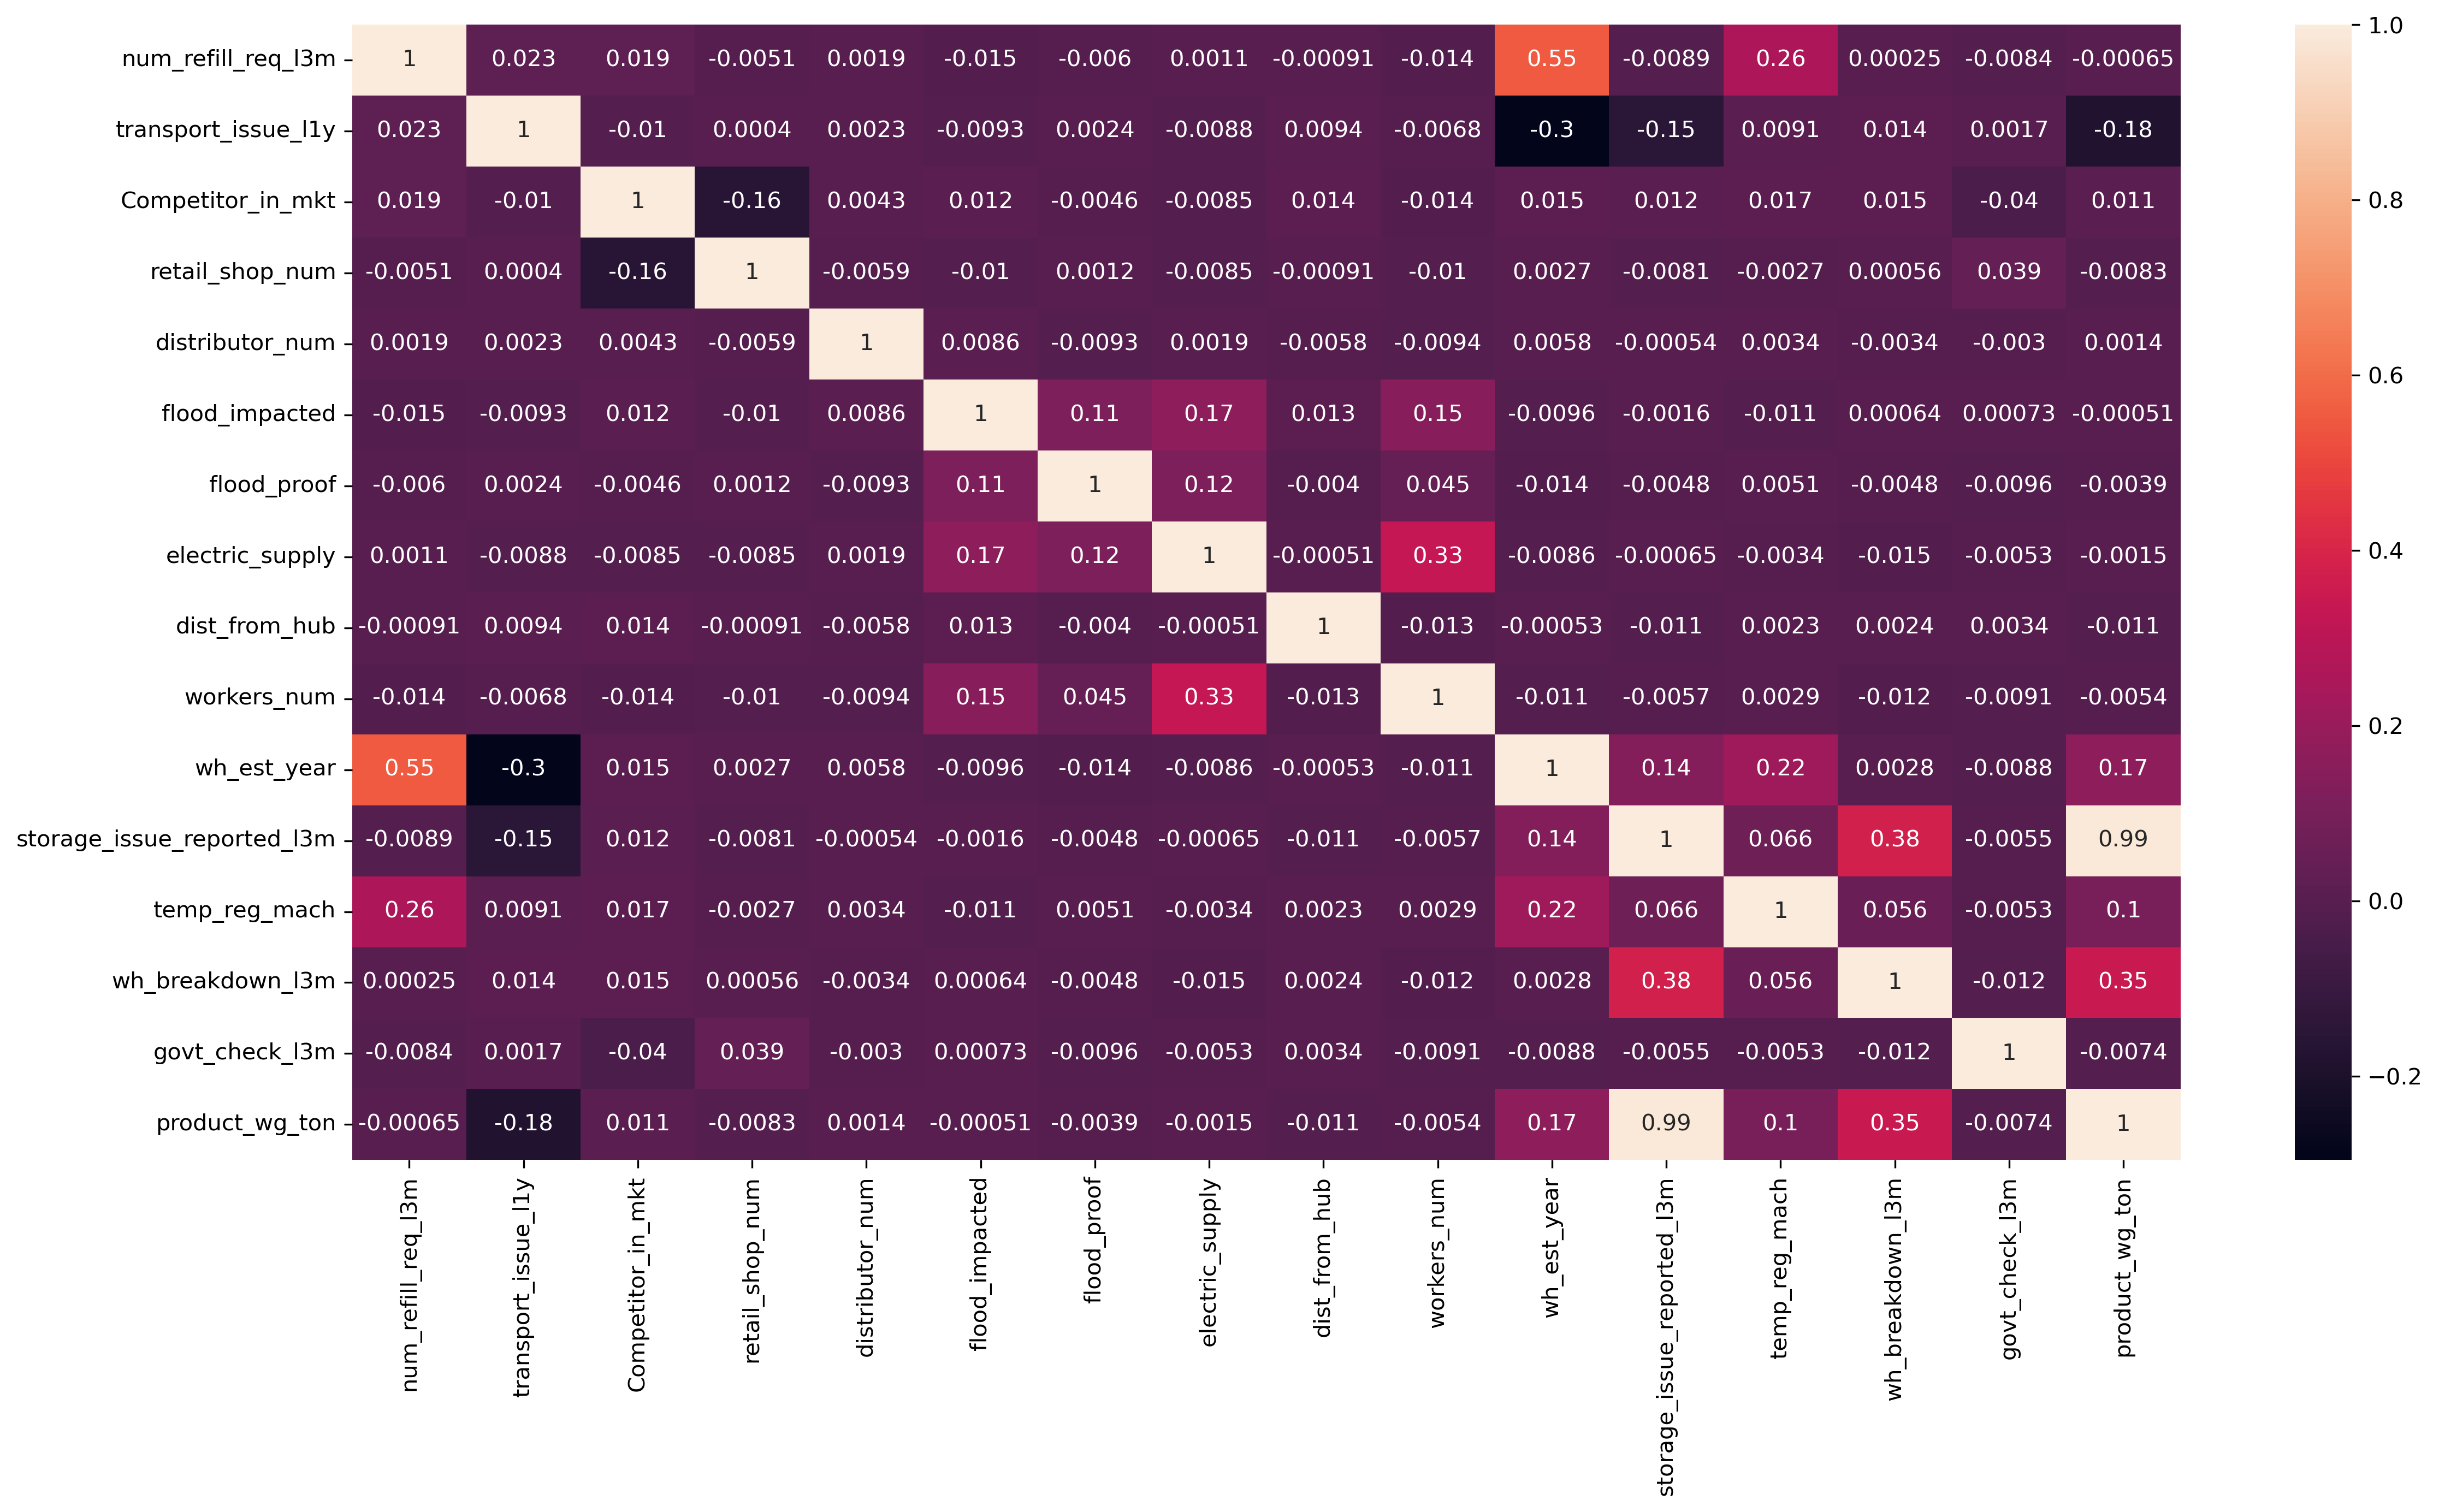

In [26]:
pic=plt.figure(figsize=(18,9),dpi=300)
sns.heatmap(data.corr(),annot=True)

#Data Analysis


Relationship between warehouse capacity size and product weight ton

In [27]:
Wh_Capacity_Prodct=data.loc[:,['WH_capacity_size','product_wg_ton','zone']]

In [28]:
Wh_Capacity_Prodct


,WH_capacity_size,product_wg_ton,zone
0,Small,17115,West
1,Large,5074,North
2,Mid,23137,South
3,Mid,22115,North
4,Large,24071,North
...,...,...,...
16615,Large,16094,West
16616,Large,21113,North
16617,Large,28117,North
16618,Small,21103,West


<Axes: xlabel='WH_capacity_size', ylabel='product_wg_ton'>

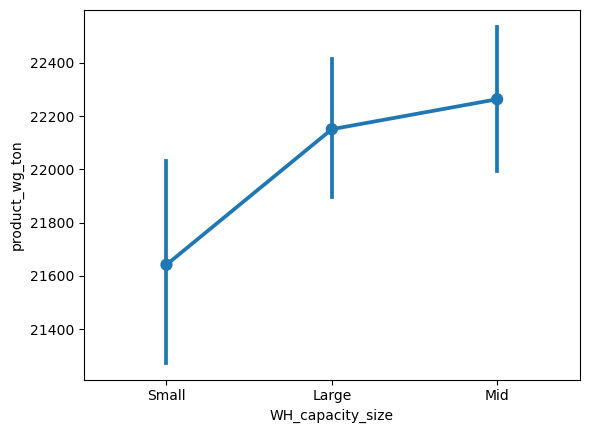

In [29]:
sns.pointplot(x = "WH_capacity_size", y = "product_wg_ton", data = Wh_Capacity_Prodct) 

In [30]:
data_=data.loc[:,['num_refill_req_l3m','transport_issue_l1y','Competitor_in_mkt','retail_shop_num',
       'distributor_num', 'flood_impacted', 'flood_proof', 'electric_supply',
       'dist_from_hub', 'workers_num',
       'storage_issue_reported_l3m', 'temp_reg_mach',
        'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton']]

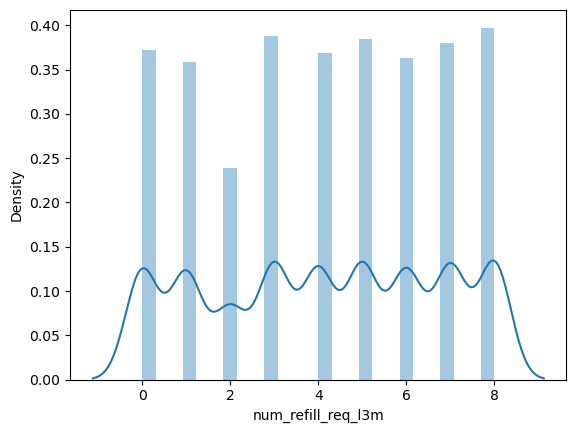

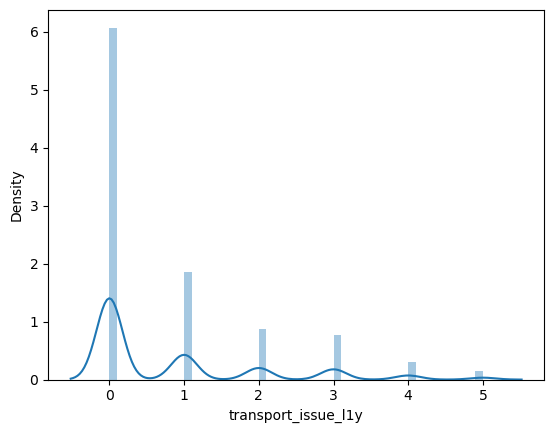

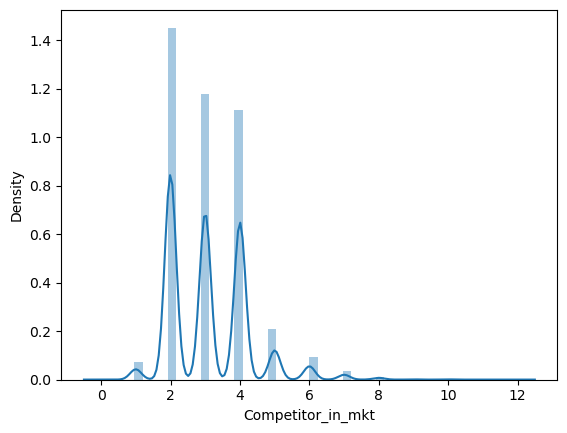

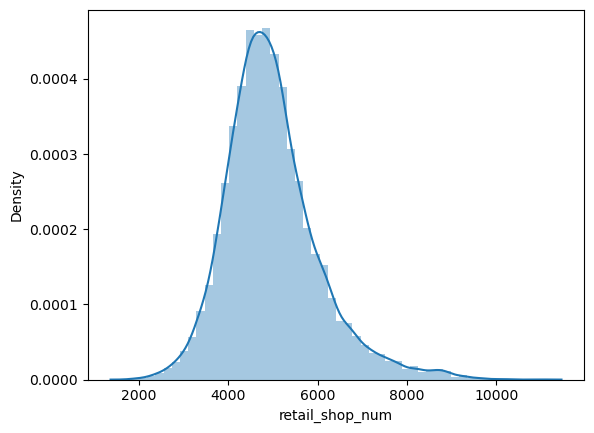

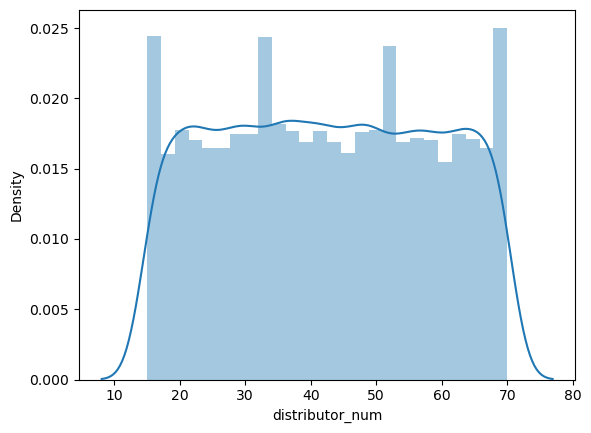

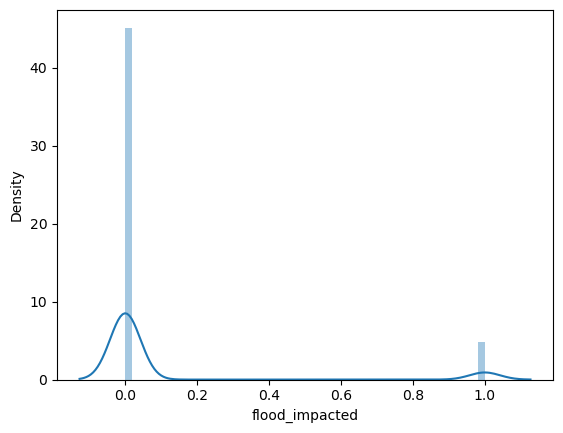

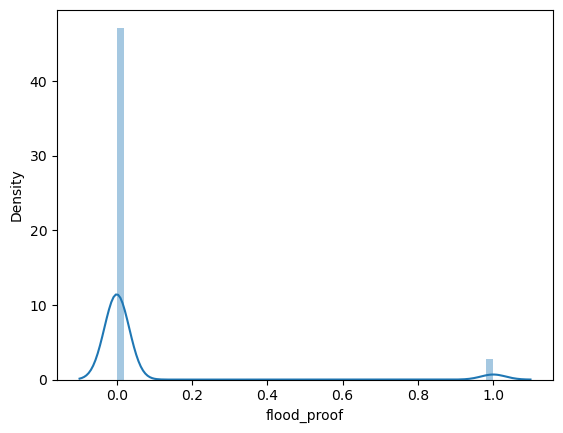

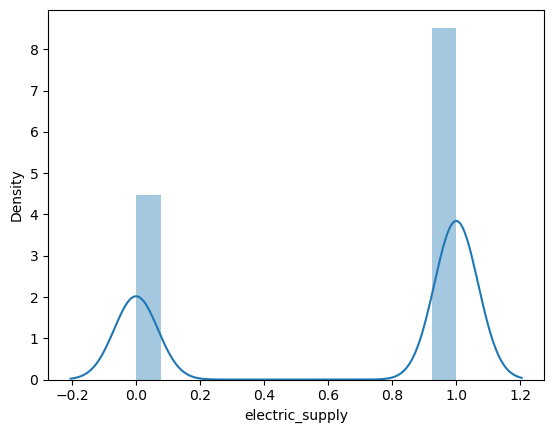

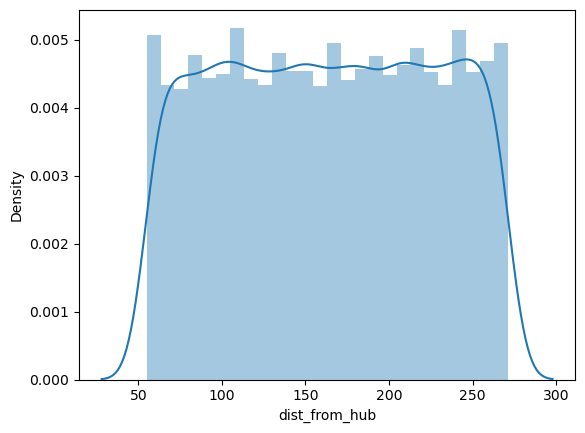

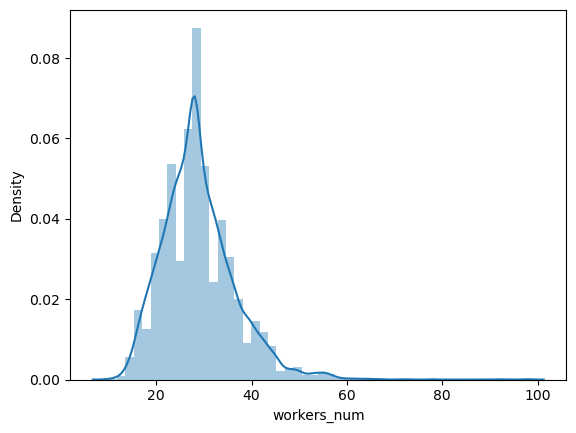

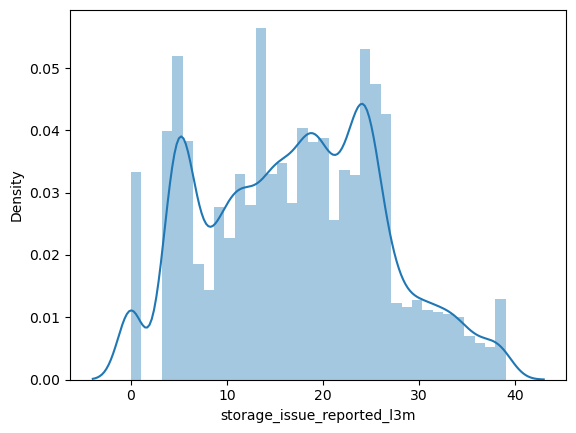

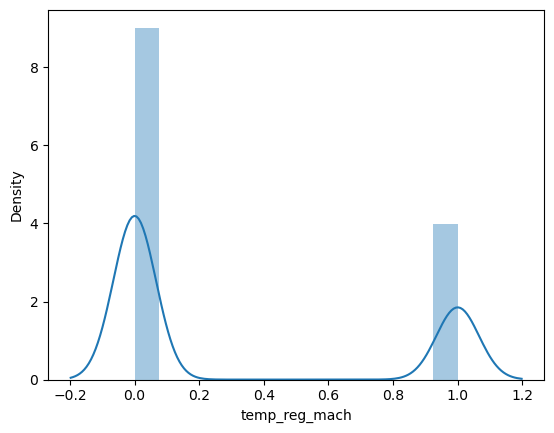

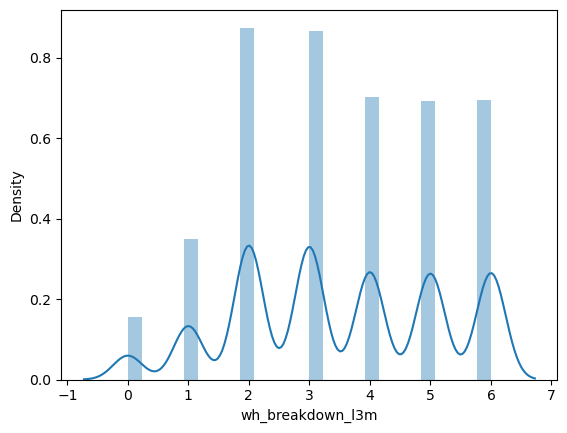

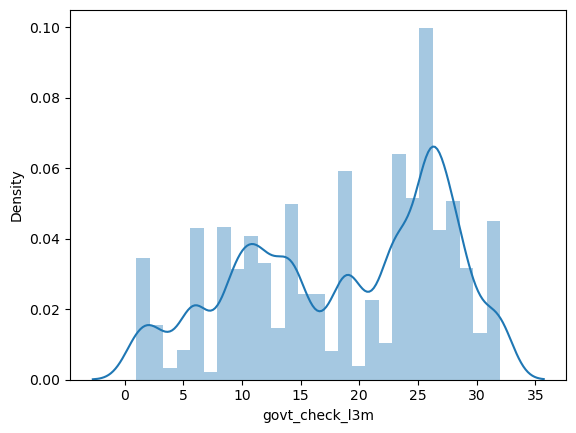

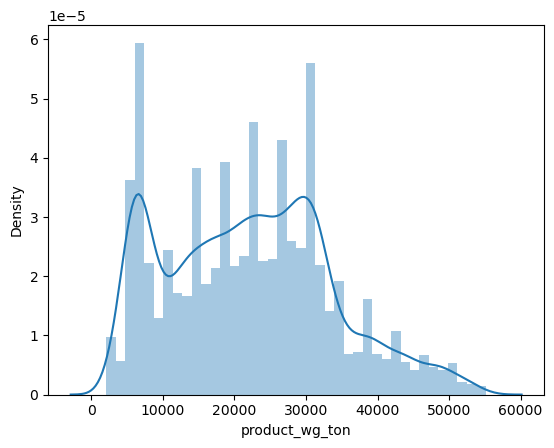

In [31]:
for i in data_.columns:
    sns.distplot(data[i])
    plt.show()

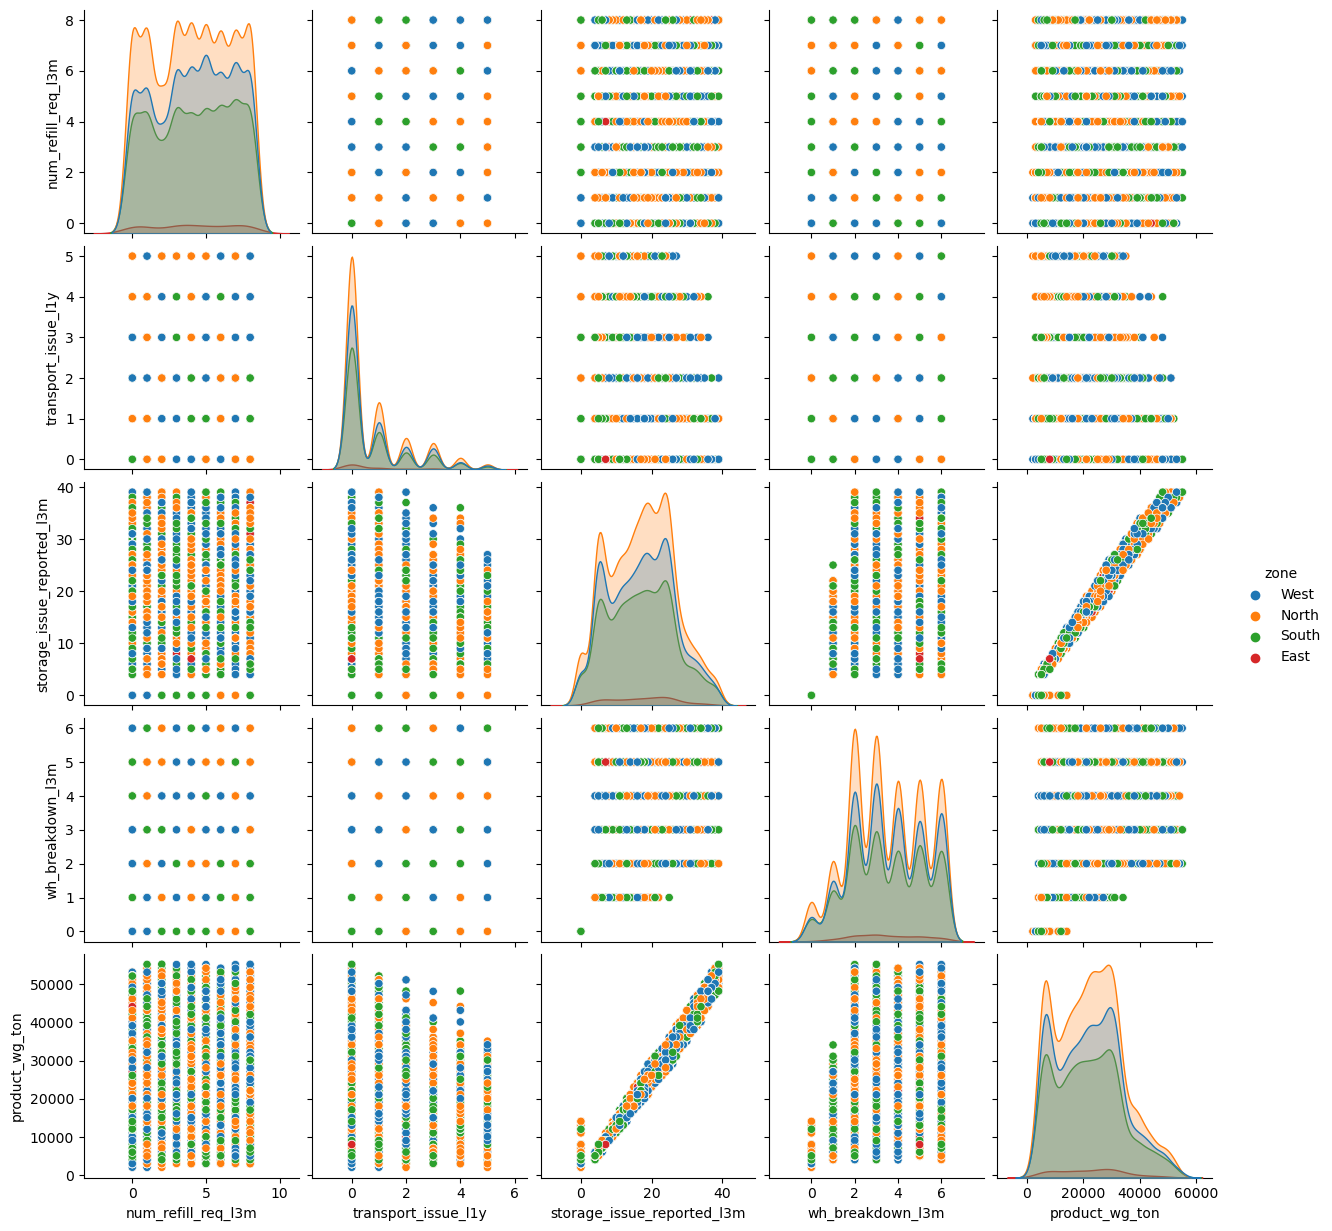

In [32]:
sns.pairplot(data=data,vars=['num_refill_req_l3m','transport_issue_l1y',
       'storage_issue_reported_l3m',
        'wh_breakdown_l3m',
       'product_wg_ton'],hue='zone')

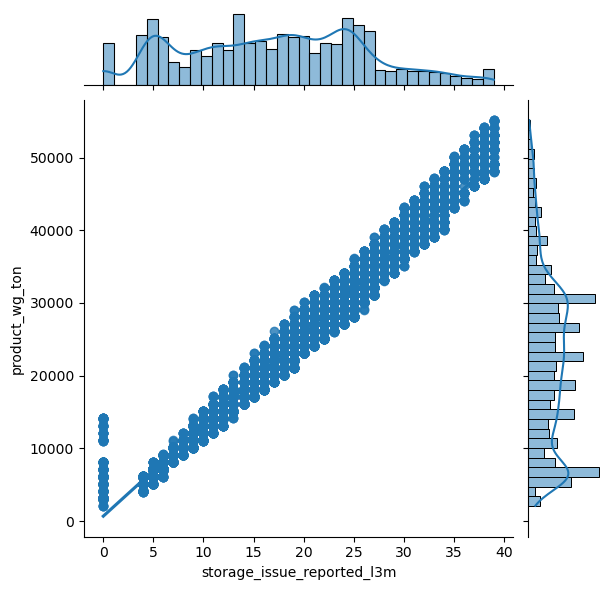

In [34]:
sns.jointplot(data=data,x='storage_issue_reported_l3m', y='product_wg_ton', kind='reg')

# Conclusion